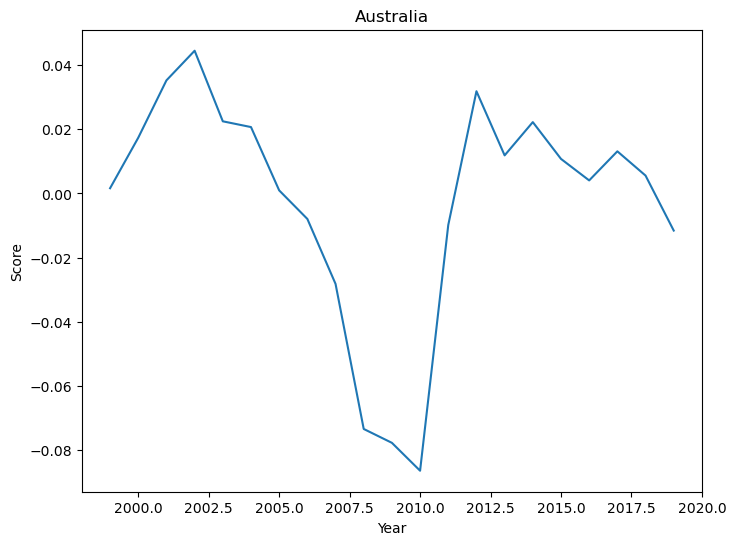

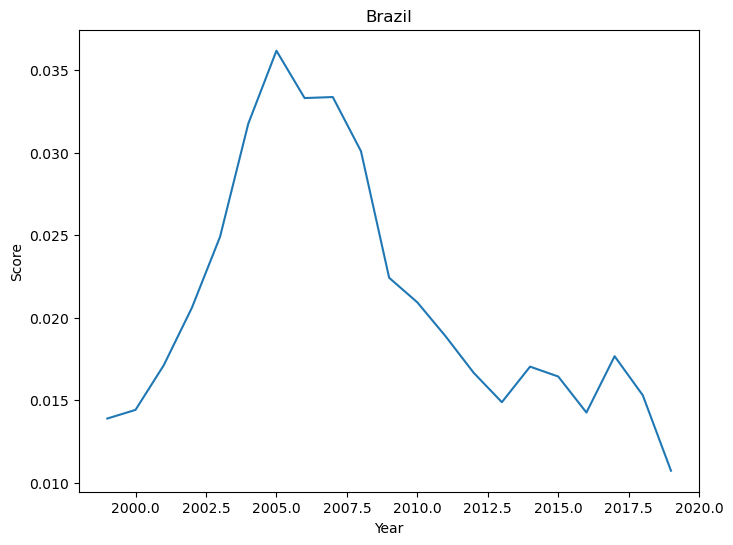

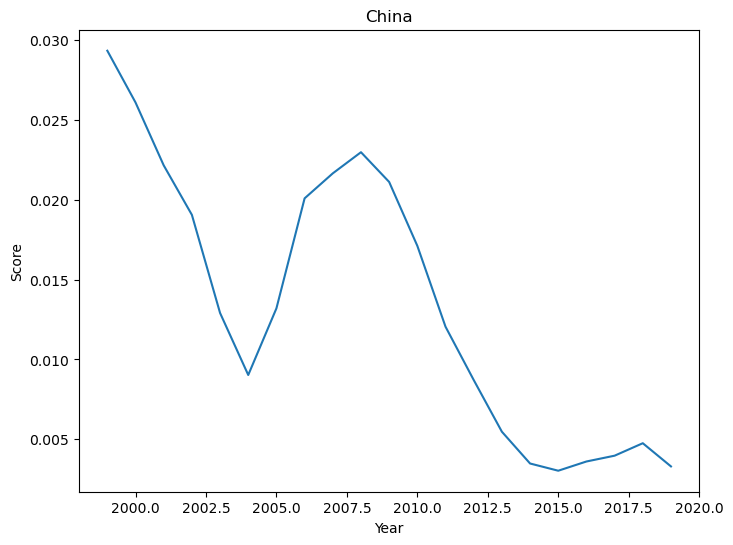

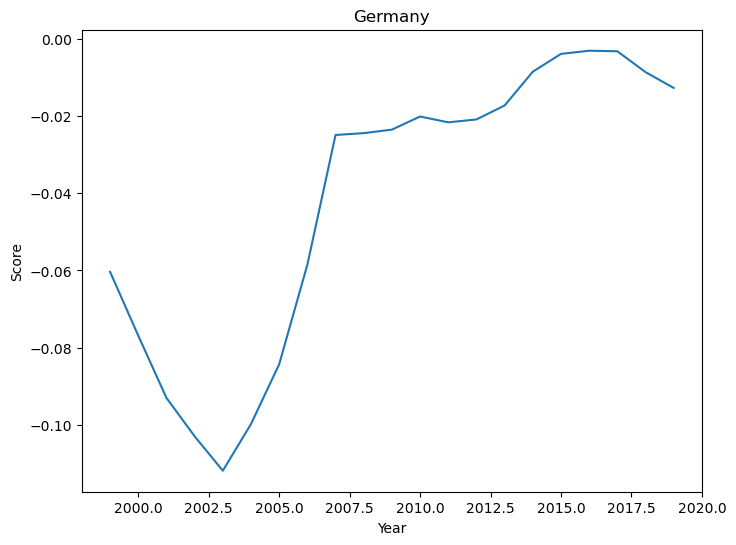

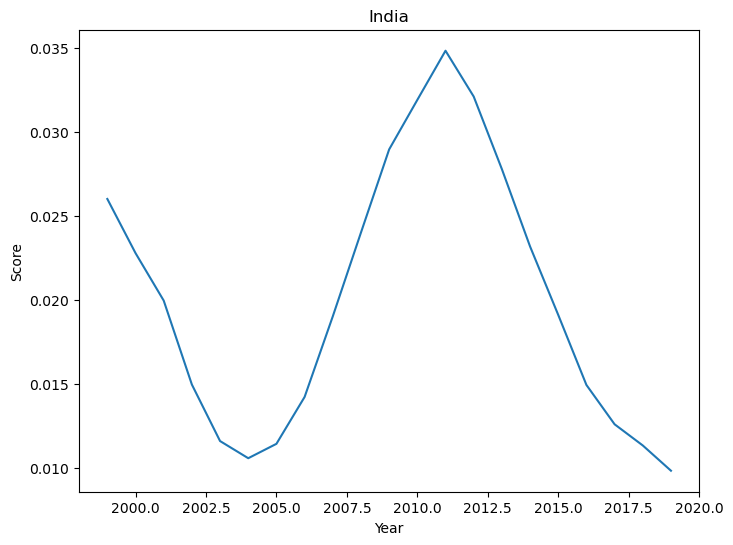

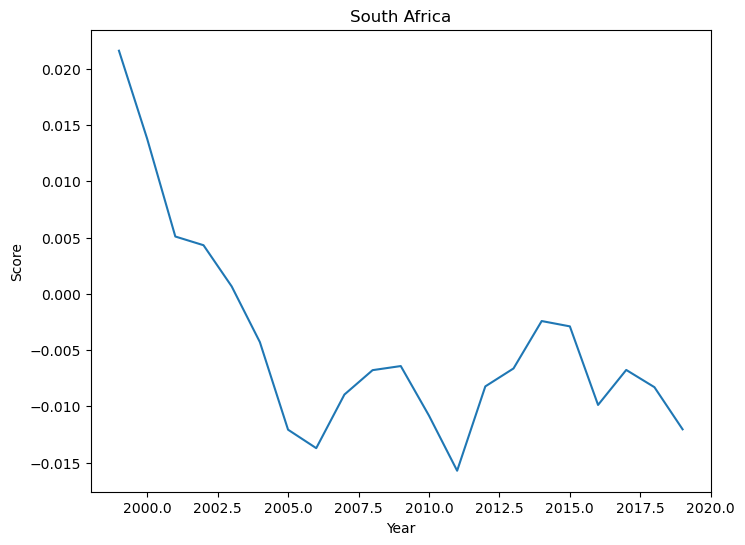

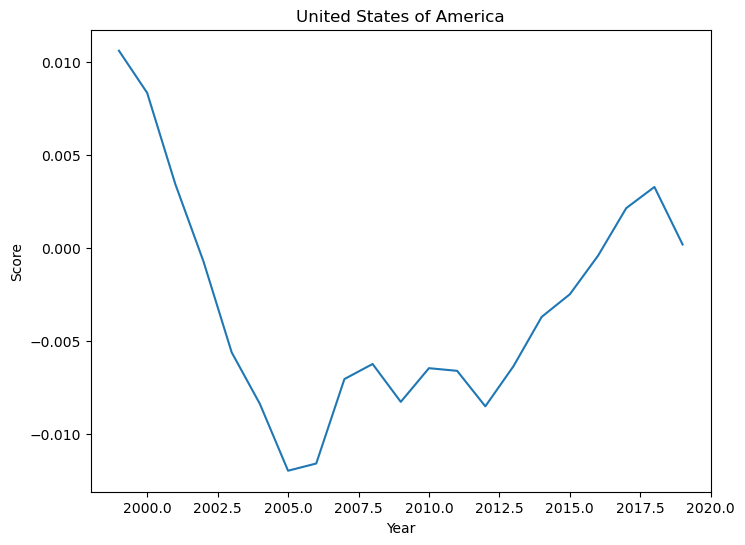

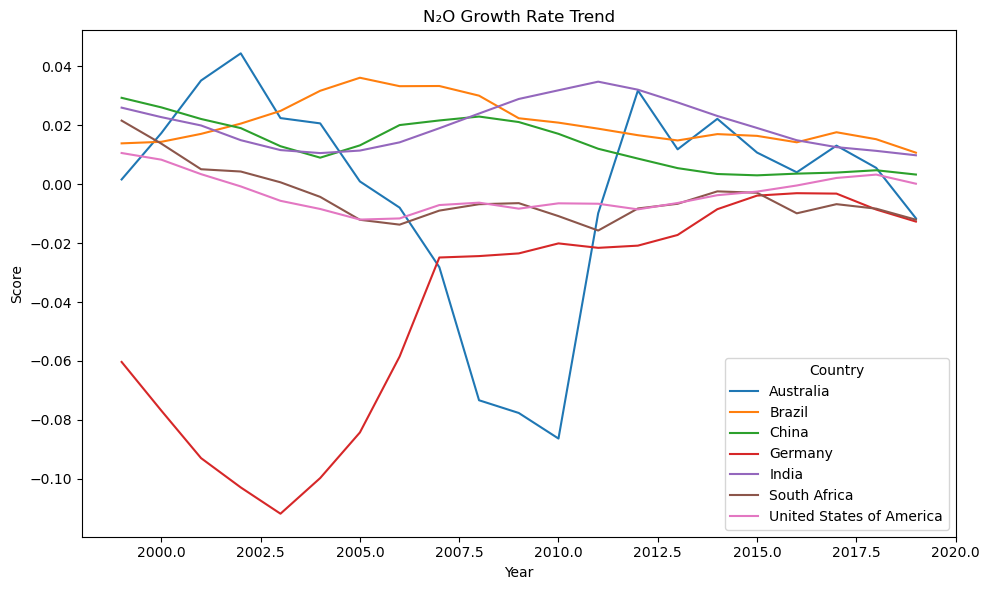

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv('./selected_indicators/NDA_raw.csv')
df_new =  (
    df.drop(['code', 'iso'], axis=1)
    .set_index(['country']).rename_axis([None])
    .T.reset_index() # Transpose teh original dataset 
    .assign(index=lambda x: x['index'].str[-4:])
    .set_index('index')
    .rename_axis(None)
    .replace(-8888, np.nan)
)

df_new
selected_countries = ['United States of America', 'China', 'India', 'Germany', 'South Africa', 'Australia', 'Brazil'] 
selected_df = df_new.loc[:, selected_countries]
selected_df
df_long = (selected_df.reset_index()
           .melt(id_vars='index', var_name='country', value_name='value')
           .astype({'index': 'float64'}))
df_long
for country, data in df_long.groupby('country'):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.plot(data['index'], data['value'], label=country)
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Score')
fig, ax = plt.subplots(figsize=(10, 6))

for country, data in df_long.groupby('country'):
    ax.plot(data['index'], data['value'], label=country)

ax.set_title('N\u2082O Growth Rate Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Score')
ax.legend(loc='best', title='Country') 

fig.tight_layout()
plt.savefig("NDA.png")
plt.show()